In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, glob, cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob

from tqdm import tqdm

from keras.layers import Input, Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.densenet import DenseNet121

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
train_set = "/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset"
test_set = "/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset"

In [5]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [6]:
for layer in inception.layers:
    layer.trainable = False

import glob

folders = glob.glob("/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset/*")

In [7]:
x = Flatten()(inception.output)
prediction = Dense(len(folders),activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 64 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
incep = model.fit(training_set,
                            validation_data = test_set,
                            epochs = 40,
                            steps_per_epoch = len(training_set),
                            validation_steps = len(test_set))

Epoch 1/40
2/2 [==============================] - 30s 20s/step - loss: 2.2871 - accuracy: 0.4844 - val_loss: 0.2548 - val_accuracy: 0.9062
Epoch 2/40
2/2 [==============================] - 17s 13s/step - loss: 1.1692 - accuracy: 0.8438 - val_loss: 1.2438 - val_accuracy: 0.8594
Epoch 3/40
2/2 [==============================] - 19s 15s/step - loss: 0.9966 - accuracy: 0.9219 - val_loss: 0.2403 - val_accuracy: 0.9531
Epoch 4/40
2/2 [==============================] - 17s 13s/step - loss: 0.5572 - accuracy: 0.9531 - val_loss: 0.7601 - val_accuracy: 0.9531
Epoch 5/40
2/2 [==============================] - 19s 15s/step - loss: 0.9937 - accuracy: 0.9219 - val_loss: 0.9858 - val_accuracy: 0.9531
Epoch 6/40
2/2 [==============================] - 23s 16s/step - loss: 0.3369 - accuracy: 0.9688 - val_loss: 0.7707 - val_accuracy: 0.9531
Epoch 7/40
2/2 [==============================] - 19s 14s/step - loss: 0.6491 - accuracy: 0.9688 - val_loss: 0.6390 - val_accuracy: 0.9531
Epoch 8/40
2/2 [===========

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
!sudo apt -y install libportaudio2
!pip install -q tflite-model-maker

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 224, 224
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 64 files belonging to 2 classes.
Found 64 files belonging to 2 classes.
Found 64 files belonging to 2 classes.


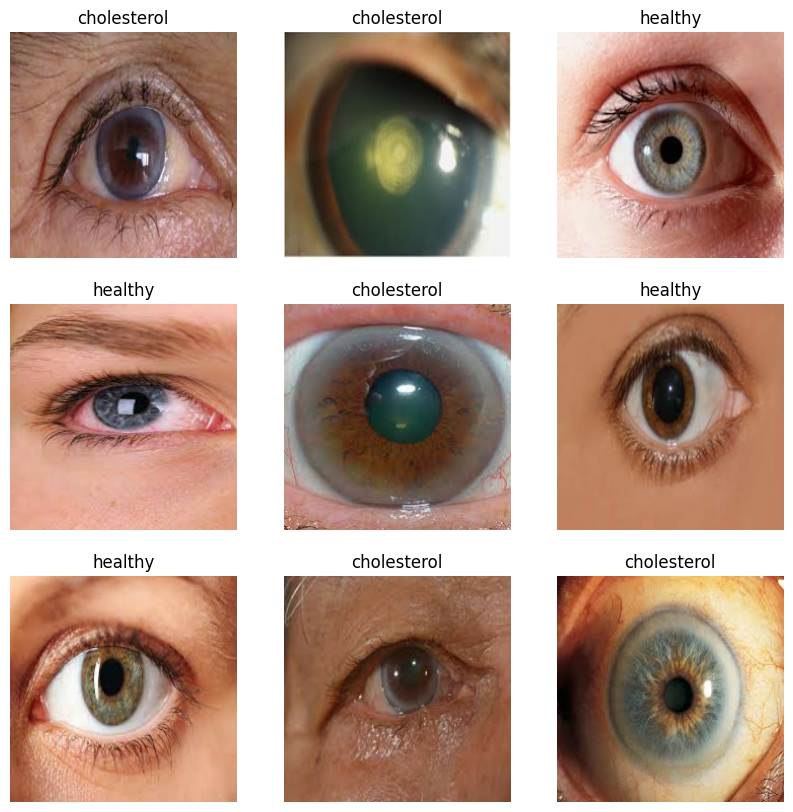

In [ ]:
class_names = ["cholesterol", "healthy"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(2)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50
)

Epoch 1/50
4/4 [==============================] - 17s 3s/step - loss: 1.0358 - accuracy: 0.5000 - val_loss: 0.6789 - val_accuracy: 0.7656
Epoch 2/50
4/4 [==============================] - 6s 1s/step - loss: 0.6761 - accuracy: 0.7812 - val_loss: 0.6408 - val_accuracy: 0.6250
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 0.6661 - accuracy: 0.6250 - val_loss: 0.5946 - val_accuracy: 0.7969
Epoch 4/50
4/4 [==============================] - 11s 3s/step - loss: 0.6008 - accuracy: 0.8281 - val_loss: 0.5305 - val_accuracy: 0.6875
Epoch 5/50
4/4 [==============================] - 7s 2s/step - loss: 0.5264 - accuracy: 0.6562 - val_loss: 0.4328 - val_accuracy: 0.9375
Epoch 6/50
4/4 [==============================] - 8s 2s/step - loss: 0.4321 - accuracy: 0.8594 - val_loss: 0.3896 - val_accuracy: 0.7969
Epoch 7/50
4/4 [==============================] - 8s 2s/step - loss: 0.3450 - accuracy: 0.8281 - val_loss: 0.2685 - val_accuracy: 0.8906
Epoch 8/50
4/4 [=======================

In [ ]:
model.evaluate(test_ds)

4/4 [==============================] - 2s 559ms/step - loss: 3.7525e-05 - accuracy: 1.0000


[3.752504562726244e-05, 1.0]

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
import os
import numpy as np 
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from PIL import Image

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import torch
import torch.nn as nn
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchsummary import summary
from torchvision.models import resnet18

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, ConfusionMatrixDisplay

In [ ]:
# Define the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
root_dir = '/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/Dataset'

target_dir = '/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/AugumentedImages'

In [ ]:
for dirpath, dirnames, filenames in os.walk(root_dir):
    target_subdir = os.path.join(target_dir, os.path.relpath(dirpath, root_dir))
    os.makedirs(target_subdir, exist_ok=True)
    
    for filename in filenames:
        if filename.endswith('.jpg'):
            img_path = os.path.join(dirpath, filename)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            i = 0
            for batch in datagen.flow(x, batch_size=1,
                                      save_to_dir=target_subdir, 
                                      save_prefix=filename[:-4], 
                                      save_format='jpg'):
                i += 1
                if i > 200:
                    break
        elif filename.endswith('.png'):
            img_path = os.path.join(dirpath, filename)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            i = 0
            for batch in datagen.flow(x, batch_size=1,
                                      save_to_dir=target_subdir, 
                                      save_prefix=filename[:-4], 
                                      save_format='png'):
                i += 1
                if i > 200:
                    break

In [ ]:
healthy_cases_dir = Path(target_dir) / 'Healthy'
cholesterol_cases_dir = Path(target_dir) / 'Cholesterol'

In [ ]:
healthy_cases = list(healthy_cases_dir.glob("*.jpg")) + list(healthy_cases_dir.glob("*.png"))
cholesterol_cases = list(cholesterol_cases_dir.glob('*.jpg')) + list(cholesterol_cases_dir.glob('*.png'))

In [ ]:
train_data = []

for img in healthy_cases:
    train_data.append((img, 0))

for img in cholesterol_cases:
    train_data.append((img, 1))

In [ ]:
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
train_data = train_data.sample(frac=1.).reset_index(drop=True)

In [ ]:
train_data.head()

,image,label
0,/content/drive/MyDrive/Machine Learning/Choles...,0
1,/content/drive/MyDrive/Machine Learning/Choles...,0
2,/content/drive/MyDrive/Machine Learning/Choles...,1
3,/content/drive/MyDrive/Machine Learning/Choles...,1
4,/content/drive/MyDrive/Machine Learning/Choles...,1


In [ ]:
len(train_data)

12721

In [ ]:
cases_count = train_data['label'].value_counts()
print(cases_count)

1    7943
0    4778
Name: label, dtype: int64


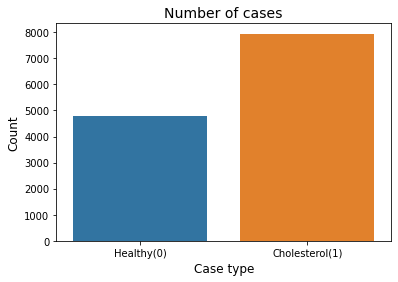

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Healthy(0)', 'Cholesterol(1)'])
plt.show()

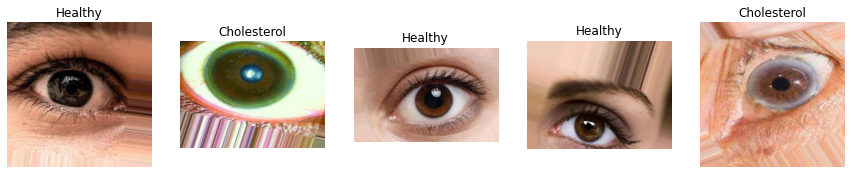

In [ ]:
train_data = train_data.sample(frac=1).reset_index(drop=True)

num_images = 5
selected_images = train_data.sample(num_images)

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 5))

for i, (index, row) in enumerate(selected_images.iterrows()):
    image = Image.open(row['image'])
    axes[i].imshow(image)
    axes[i].set_title('Healthy' if row['label'] == 0 else 'Cholesterol')
    axes[i].axis('off')
    
plt.show()

In [ ]:
def train_valid_loader(data_dir, batch_size, augment, valid_size, size):
    valid_transform = transforms.Compose([transforms.Resize([size,size]),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
                                 ])
    if augment:
        train_transform = transforms.Compose([transforms.Resize([size,size]),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
                                 ])
    else:
        train_transform = transforms.Compose([transforms.Resize([size,size]),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
                                 ])

    train_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform,)

    valid_dataset = datasets.ImageFolder(root=data_dir, transform=valid_transform,)

    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler,)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, sampler=valid_sampler,)

    return (train_loader, valid_loader)

In [ ]:
train_loader, test_loader = train_valid_loader("/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/AugumentedImages/", batch_size = 32, augment = False, valid_size=0.2, size=200)

In [ ]:
def train(model, trainloader, loss_fn, optimizer, n):
    correct = 0
    losses = []
    model.train()
    for X, y in trainloader:  
        X = X
        y = y      
        optimizer.zero_grad()
        output = model(X)
        _, predict = torch.max(output, 1)
        correct += torch.sum(predict == y)
        
        loss = loss_fn(output, y)
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
    return (correct.item() / n), np.mean(losses)

In [ ]:
def validation(model, testloader, loss_fn, n):
    correct = 0
    losses = []
    model.eval()
    with torch.no_grad():
        for X, y in testloader:
            X = X
            y = y      
            output = model(X)
            _, predict = torch.max(output, 1)
            correct += torch.sum(predict == y)

            loss = loss_fn(output, y)
            losses.append(loss.item())
    
    return (correct.item() / n), np.mean(losses)

In [ ]:
def fit(model, loss_fn, optimizer, EPOCHS):
    losses_train, losses_valid, acc_train, acc_valid, predicts = ([] for i in range(5))
    best_acc = 0

    for e in range(EPOCHS):
        train_c, train_l = train(model, train_loader, loss_fn, optimizer, len(train_loader.sampler))
        print(f"Epoch {e + 1} --- train accuracy {train_c * 100:.3f}    train losses {train_l:.3f}", end='')
        losses_train.append(train_l)  
        acc_train.append(train_c)  

        val_c, val_l = validation(model, test_loader, loss_fn, len(test_loader.sampler))
        print(f" --- valid accuracy {val_c * 100:.3f}   valid losses {val_l:.3f}")
        losses_valid.append(val_l)
        acc_valid.append(val_c)
    return losses_train, losses_valid, acc_train, acc_valid

In [ ]:
globprec, globrec, globf1 = 0, 0, 0

In [ ]:
class FCModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.modelfc = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 8, stride = 3, padding = 4, dilation = 1),
            nn.ReLU(),
            nn.MaxPool2d(4),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 7, stride = 2, padding = 3, dilation = 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 6, stride = 1, padding = 3, dilation = 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(512, 2),
        )
        
    def forward(self, x):
        return self.modelfc(x)

In [ ]:
model = FCModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
losses_train, losses_valid, acc_train, acc_valid = fit(model, loss_fn, optimizer, 20)

Epoch 1 --- train accuracy 81.311    train losses 0.397 --- valid accuracy 91.667   valid losses 0.202
Epoch 2 --- train accuracy 95.323    train losses 0.130 --- valid accuracy 97.838   valid losses 0.075
Epoch 3 --- train accuracy 98.349    train losses 0.056 --- valid accuracy 98.270   valid losses 0.046
Epoch 4 --- train accuracy 98.693    train losses 0.041 --- valid accuracy 98.703   valid losses 0.037
Epoch 5 --- train accuracy 99.686    train losses 0.018 --- valid accuracy 99.489   valid losses 0.021
Epoch 6 --- train accuracy 99.725    train losses 0.013 --- valid accuracy 99.646   valid losses 0.013
Epoch 7 --- train accuracy 99.794    train losses 0.010 --- valid accuracy 99.764   valid losses 0.008
Epoch 8 --- train accuracy 99.941    train losses 0.005 --- valid accuracy 99.843   valid losses 0.006
Epoch 9 --- train accuracy 99.971    train losses 0.003 --- valid accuracy 99.882   valid losses 0.006
Epoch 10 --- train accuracy 99.745    train losses 0.009 --- valid accura

In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in train_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6379
           1       1.00      1.00      1.00      3798

    accuracy                           1.00     10177
   macro avg       1.00      1.00      1.00     10177
weighted avg       1.00      1.00      1.00     10177



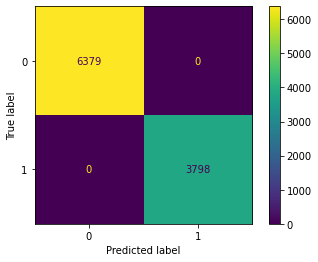

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot();

In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1564
           1       1.00      1.00      1.00       980

    accuracy                           1.00      2544
   macro avg       1.00      1.00      1.00      2544
weighted avg       1.00      1.00      1.00      2544



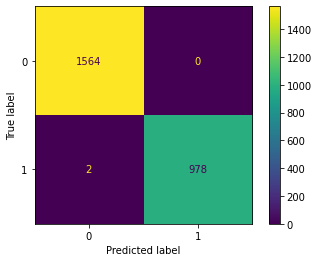

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot();

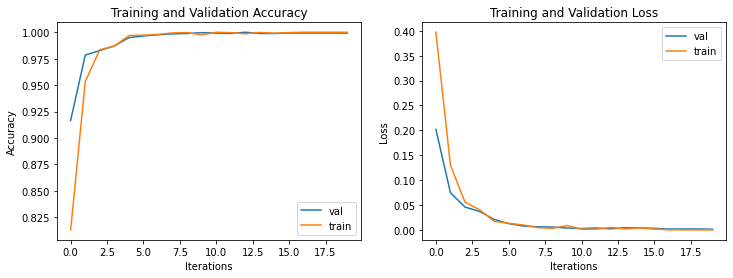

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.set_title("Training and Validation Accuracy")
ax1.plot(acc_valid,label="val")
ax1.plot(acc_train,label="train")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Accuracy")
ax1.legend()

ax2.set_title("Training and Validation Loss")
ax2.plot(losses_valid,label="val")
ax2.plot(losses_train,label="train")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.legend();

In [ ]:
PATH = "/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/FC_model.pt"

torch.save(model.state_dict(), PATH)

In [ ]:
model = resnet18(progress=False, pretrained=True)
model.fc = nn.Linear(512, 2)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
losses_train, losses_valid, acc_train, acc_valid = fit(model, loss_fn, optimizer, 5)

Epoch 1 --- train accuracy 99.666    train losses 0.011 --- valid accuracy 100.000   valid losses 0.000
Epoch 2 --- train accuracy 99.990    train losses 0.001 --- valid accuracy 100.000   valid losses 0.000


In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in train_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot();

In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot();

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.set_title("Training and Validation Accuracy")
ax1.plot(acc_valid,label="val")
ax1.plot(acc_train,label="train")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Accuracy")
ax1.legend()

ax2.set_title("Training and Validation Loss")
ax2.plot(losses_valid,label="val")
ax2.plot(losses_train,label="train")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.legend();

In [ ]:
PATH = "/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/ResNet18_model.pt"

torch.save(model.state_dict(), PATH)

In [ ]:
!pip install onnx

In [ ]:
!pip install onnxruntime

In [ ]:
import torch
import onnx
import onnxruntime

# Load the PyTorch model
pt_model = torch.load('/content/drive/MyDrive/Machine Learning/Cholesterol Detection/Project/FC_model.pt')

# Export the PyTorch model to ONNX format
dummy_input = torch.randn(1, 3, 224, 224, requires_grad=True)
input_names = [0, 1]
output_names = ["Healthy", "Cholesterol"]
onnx_file_path = "FC_model.onnx"
torch.onnx.export(pt_model, dummy_input, onnx_file_path, input_names=input_names, output_names=output_names)